### Insertions: Random Selection of Structural Variants

** Note: tSNE Plots and DBSCAN Histogram/CDF**

** Background**
- 5000 Insertions and 5000 Deletions were randomly selected from our union callset of sequence resolved variants.

- **3991** unique insertions are described below.

- Features were generated by svviz to describe each variant

- tSNE was used to visualize the structure of the data

- The goal is to randomly select datapoints from each unique group/tSNE cluster and distribute these selected variants for manual curation. 

- In order to randomly select samples from each unique tSNE cluster, DBSCAN will be used to generate cluster labels. For each set of DBSCAN cluster labels, a select number will be randomly selected from each cluster group.

In [71]:
'''
Import statements
'''
import pandas as pd
import numpy as np
from fancyimpute import KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
import sqlite3
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import DBSCAN
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [72]:
'''
Load Data
'''
df = pd.read_csv("/Volumes/lesleydata/SVVIZOutput/April112017/Step4/MachineLearning/Step1.DataCleaning.Output/INS/svviz.Annotate.INS.HG002.csv")
df4 = pd.read_csv("/Volumes/lesleydata/SVVIZOutput/April112017/Step4/MachineLearning/Step1.DataCleaning.Output/INS/svviz.Annotate.INS.HG002.csv")
log_size = pd.read_csv("/Volumes/lesleydata/SVVIZOutput/April112017/Step4/MachineLearning/Step3.tSNE/log_Size.csv")

***
** Part 1: Data Preprocessing **
***

In [73]:
'''
Convert Categorical to Numerical
'''
#Label Encoding: convert categorical to numerical
label_encoder = preprocessing.LabelEncoder()
df['chrom'] = label_encoder.fit_transform(df['chrom'])
df['SVtype'] = label_encoder.fit_transform(df['SVtype'])
df['sample'] = label_encoder.fit_transform(df['sample'])
df['type'] = label_encoder.fit_transform(df['type'])

In [14]:
'''
Use KNN to impute missing values
'''
# Count Number of NaN in each column
dfNaN = pd.DataFrame()
df.isnull().sum()

chrom                                                    0
start                                                    0
end                                                      0
sample                                                   0
id                                                       0
type                                                     0
SVtype                                                   0
Size                                                     0
Ill300x.alt_alnScore_mean                                5
Ill300x.alt_alnScore_std                                 5
Ill300x.alt_count                                        5
Ill300x.alt_insertSize_mean                              5
Ill300x.alt_insertSize_std                               5
Ill300x.alt_reason_alignmentScore                        5
Ill300x.alt_reason_insertSizeScore                       5
Ill300x.alt_reason_orientation                           5
Ill300x.amb_alnScore_mean                               

In [16]:
'''
Use KNN to impute missing values
'''
#Convert dataframe to matrix
X = df.as_matrix()

# Imput missing values from three closest observations
X_imputed = KNN(k=3).complete(X)
df2 = pd.DataFrame(X_imputed)

#Re-label all columns in the dataframe
df2.columns = ['chrom', 'start', 'end', 'sample', 'id', 'type', 'SVtype', 'Size', 'Ill300x.alt_alnScore_mean', 'Ill300x.alt_alnScore_std', 'Ill300x.alt_count', 'Ill300x.alt_insertSize_mean', 'Ill300x.alt_insertSize_std', 'Ill300x.alt_reason_alignmentScore', 'Ill300x.alt_reason_insertSizeScore', 'Ill300x.alt_reason_orientation', 'Ill300x.amb_alnScore_mean', 'Ill300x.amb_alnScore_std', 'Ill300x.amb_count', 'Ill300x.amb_insertSize_mean', 'Ill300x.amb_insertSize_std', 'Ill300x.amb_reason_alignmentScore_alignmentScore', 'Ill300x.amb_reason_alignmentScore_insertSizeScore', 'Ill300x.amb_reason_alignmentScore_orientation', 'Ill300x.amb_reason_flanking', 'Ill300x.amb_reason_insertSizeScore_insertSizeScore', 'Ill300x.amb_reason_insertSizeScore_orientation', 'Ill300x.amb_reason_multimapping', 'Ill300x.amb_reason_orientation_alignmentScore', 'Ill300x.amb_reason_orientation_orientation', 'Ill300x.amb_reason_same_scores', 'Ill300x.ref_alnScore_mean', 'Ill300x.ref_alnScore_std', 'Ill300x.ref_count', 'Ill300x.ref_insertSize_mean', 'Ill300x.ref_insertSize_std', 'Ill300x.ref_reason_alignmentScore', 'Ill300x.ref_reason_insertSizeScore', 'Ill300x.ref_reason_orientation', 'Ill300x.GT', 'Ill250.alt_alnScore_mean', 'Ill250.alt_alnScore_std', 'Ill250.alt_count', 'Ill250.alt_insertSize_mean', 'Ill250.alt_insertSize_std', 'Ill250.alt_reason_alignmentScore', 'Ill250.alt_reason_insertSizeScore', 'Ill250.alt_reason_orientation', 'Ill250.amb_alnScore_mean', 'Ill250.amb_alnScore_std', 'Ill250.amb_count', 'Ill250.amb_insertSize_mean', 'Ill250.amb_insertSize_std', 'Ill250.amb_reason_alignmentScore_alignmentScore', 'Ill250.amb_reason_alignmentScore_orientation', 'Ill250.amb_reason_flanking', 'Ill250.amb_reason_insertSizeScore_insertSizeScore', 'Ill250.amb_reason_multimapping', 'Ill250.amb_reason_orientation_alignmentScore', 'Ill250.amb_reason_orientation_orientation', 'Ill250.amb_reason_same_scores', 'Ill250.ref_alnScore_mean', 'Ill250.ref_alnScore_std', 'Ill250.ref_count', 'Ill250.ref_insertSize_mean', 'Ill250.ref_insertSize_std', 'Ill250.ref_reason_alignmentScore', 'Ill250.ref_reason_insertSizeScore', 'Ill250.ref_reason_orientation', 'Ill250.GT', 'IllMP.alt_alnScore_mean', 'IllMP.alt_alnScore_std', 'IllMP.alt_count', 'IllMP.alt_insertSize_mean', 'IllMP.alt_insertSize_std', 'IllMP.alt_reason_alignmentScore', 'IllMP.alt_reason_insertSizeScore', 'IllMP.alt_reason_orientation', 'IllMP.amb_alnScore_mean', 'IllMP.amb_alnScore_std', 'IllMP.amb_count', 'IllMP.amb_insertSize_mean', 'IllMP.amb_insertSize_std', 'IllMP.amb_reason_alignmentScore_alignmentScore', 'IllMP.amb_reason_alignmentScore_orientation', 'IllMP.amb_reason_flanking', 'IllMP.amb_reason_insertSizeScore_insertSizeScore', 'IllMP.amb_reason_multimapping', 'IllMP.amb_reason_orientation_alignmentScore', 'IllMP.amb_reason_orientation_orientation', 'IllMP.amb_reason_same_scores', 'IllMP.ref_alnScore_mean', 'IllMP.ref_alnScore_std', 'IllMP.ref_count', 'IllMP.ref_insertSize_mean', 'IllMP.ref_insertSize_std', 'IllMP.ref_reason_alignmentScore', 'IllMP.ref_reason_insertSizeScore', 'IllMP.ref_reason_orientation', 'IllMP.GT', 'TenX.HP1_alt_alnScore_mean', 'TenX.HP1_alt_alnScore_std', 'TenX.HP1_alt_count', 'TenX.HP1_alt_insertSize_mean', 'TenX.HP1_alt_insertSize_std', 'TenX.HP1_alt_reason_alignmentScore', 'TenX.HP1_alt_reason_insertSizeScore', 'TenX.HP1_alt_reason_orientation', 'TenX.HP1_amb_alnScore_mean', 'TenX.HP1_amb_alnScore_std', 'TenX.HP1_amb_count', 'TenX.HP1_amb_insertSize_mean', 'TenX.HP1_amb_insertSize_std', 'TenX.HP1_amb_reason_alignmentScore_alignmentScore', 'TenX.HP1_amb_reason_alignmentScore_orientation', 'TenX.HP1_amb_reason_flanking', 'TenX.HP1_amb_reason_insertSizeScore_insertSizeScore', 'TenX.HP1_amb_reason_multimapping', 'TenX.HP1_amb_reason_orientation_alignmentScore', 'TenX.HP1_amb_reason_orientation_orientation', 'TenX.HP1_amb_reason_same_scores', 'TenX.HP1_ref_alnScore_mean', 'TenX.HP1_ref_alnScore_std', 'TenX.HP1_ref_count', 'TenX.HP1_ref_insertSize_mean', 'TenX.HP1_ref_insertSize_std', 'TenX.HP1_ref_reason_alignmentScore', 'TenX.HP1_ref_reason_insertSizeScore', 'TenX.HP1_ref_reason_orientation', 'TenX.HP2_alt_alnScore_mean', 'TenX.HP2_alt_alnScore_std', 'TenX.HP2_alt_count', 'TenX.HP2_alt_insertSize_mean', 'TenX.HP2_alt_insertSize_std', 'TenX.HP2_alt_reason_alignmentScore', 'TenX.HP2_alt_reason_insertSizeScore', 'TenX.HP2_alt_reason_orientation', 'TenX.HP2_amb_alnScore_mean', 'TenX.HP2_amb_alnScore_std', 'TenX.HP2_amb_count', 'TenX.HP2_amb_insertSize_mean', 'TenX.HP2_amb_insertSize_std', 'TenX.HP2_amb_reason_alignmentScore_alignmentScore', 'TenX.HP2_amb_reason_alignmentScore_orientation', 'TenX.HP2_amb_reason_flanking', 'TenX.HP2_amb_reason_multimapping', 'TenX.HP2_amb_reason_orientation_alignmentScore', 'TenX.HP2_amb_reason_orientation_insertSizeScore', 'TenX.HP2_amb_reason_orientation_orientation', 'TenX.HP2_amb_reason_same_scores', 'TenX.HP2_ref_alnScore_mean', 'TenX.HP2_ref_alnScore_std', 'TenX.HP2_ref_count', 'TenX.HP2_ref_insertSize_mean', 'TenX.HP2_ref_insertSize_std', 'TenX.HP2_ref_reason_alignmentScore', 'TenX.HP2_ref_reason_insertSizeScore', 'TenX.HP2_ref_reason_orientation', 'TenX.GT', 'pacbio.alt_alnScore_mean', 'pacbio.alt_alnScore_std', 'pacbio.alt_count', 'pacbio.alt_insertSize_mean', 'pacbio.alt_insertSize_std', 'pacbio.alt_reason_alignmentScore', 'pacbio.amb_alnScore_mean', 'pacbio.amb_alnScore_std', 'pacbio.amb_count', 'pacbio.amb_insertSize_mean', 'pacbio.amb_insertSize_std', 'pacbio.amb_reason_alignmentScore_alignmentScore', 'pacbio.amb_reason_flanking', 'pacbio.amb_reason_multimapping', 'pacbio.amb_reason_same_scores', 'pacbio.ref_alnScore_mean', 'pacbio.ref_alnScore_std', 'pacbio.ref_count', 'pacbio.ref_insertSize_mean', 'pacbio.ref_insertSize_std', 'pacbio.ref_reason_alignmentScore', 'pacbio.GT', 'GTcons', 'GTconflict', 'GTsupp', 'tandemrep_cnt', 'tandemrep_pct', 'segdup_cnt', 'segdup_pct', 'refN_cnt', 'refN_pct']
df2.drop('GTcons',axis=1)

Imputing row 1/3991 with 1 missing, elapsed time: 15.905
Imputing row 101/3991 with 1 missing, elapsed time: 15.945
Imputing row 201/3991 with 1 missing, elapsed time: 15.960
Imputing row 301/3991 with 0 missing, elapsed time: 15.977
Imputing row 401/3991 with 1 missing, elapsed time: 15.987
Imputing row 501/3991 with 1 missing, elapsed time: 15.999
Imputing row 601/3991 with 60 missing, elapsed time: 16.016
Imputing row 701/3991 with 1 missing, elapsed time: 16.033
Imputing row 801/3991 with 1 missing, elapsed time: 16.049
Imputing row 901/3991 with 1 missing, elapsed time: 16.058
Imputing row 1001/3991 with 1 missing, elapsed time: 16.070
Imputing row 1101/3991 with 1 missing, elapsed time: 16.090
Imputing row 1201/3991 with 1 missing, elapsed time: 16.105
Imputing row 1301/3991 with 1 missing, elapsed time: 16.120
Imputing row 1401/3991 with 2 missing, elapsed time: 16.131
Imputing row 1501/3991 with 2 missing, elapsed time: 16.153
Imputing row 1601/3991 with 2 missing, elapsed time

,chrom,start,end,sample,id,type,SVtype,Size,Ill300x.alt_alnScore_mean,Ill300x.alt_alnScore_std,...,pacbio.ref_reason_alignmentScore,pacbio.GT,GTconflict,GTsupp,tandemrep_cnt,tandemrep_pct,segdup_cnt,segdup_pct,refN_cnt,refN_pct
0,21.0,53947.0,53948.0,0.0,986.0,0.0,0.0,39.0,533.000000,0.000000,...,0.0,0.0,2.0,1.0,23.312042,1.000000,1.0,1.000000,0.0,0.0
1,17.0,73956.0,92439.0,0.0,760.0,0.0,0.0,140.0,0.000000,0.000000,...,2.0,-1.0,-1.0,2.0,32.000000,0.202023,3.0,0.122599,0.0,0.0
2,3.0,155088.0,155089.0,0.0,773.0,0.0,0.0,27.0,555.574713,16.951338,...,0.0,2.0,-1.0,0.0,1.000000,1.000000,1.0,1.000000,0.0,0.0
3,0.0,167195.0,167196.0,0.0,249.0,0.0,0.0,67.0,569.722892,15.492955,...,-1.0,-1.0,0.0,0.0,1.000000,0.000000,1.0,1.000000,0.0,0.0
4,15.0,176455.0,176818.0,0.0,515.0,0.0,0.0,144.0,0.000000,0.000000,...,39.0,-1.0,1.0,0.0,1.000000,1.000000,2.0,0.920110,0.0,0.0
5,21.0,204839.0,204840.0,0.0,361.0,0.0,0.0,280.0,590.000000,0.000000,...,30.0,0.0,-1.0,1.0,1.000000,1.000000,0.0,0.000000,0.0,0.0
6,12.0,239408.0,239409.0,0.0,960.0,0.0,0.0,128.0,542.333333,22.881336,...,27.0,0.0,-1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
7,11.0,294343.0,294344.0,0.0,212.0,0.0,0.0,64.0,576.854054,9.927047,...,2.0,1.0,1.0,1.0,0.782900,1.000000,0.0,0.000000,0.0,0.0
8,9.0,312219.0,312220.0,0.0,266.0,0.0,0.0,24.0,0.000000,0.000000,...,20.0,1.0,-1.0,0.0,1.000000,1.000000,0.0,0.000000,0.0,0.0
9,18.0,343374.0,343375.0,0.0,537.0,0.0,0.0,23.0,576.966667,8.199526,...,0.0,2.0,-1.0,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.0


In [18]:
# Count NaNs post KNN imputation
df2.isnull().sum()

chrom                                                 0
start                                                 0
end                                                   0
sample                                                0
id                                                    0
type                                                  0
SVtype                                                0
Size                                                  0
Ill300x.alt_alnScore_mean                             0
Ill300x.alt_alnScore_std                              0
Ill300x.alt_count                                     0
Ill300x.alt_insertSize_mean                           0
Ill300x.alt_insertSize_std                            0
Ill300x.alt_reason_alignmentScore                     0
Ill300x.alt_reason_insertSizeScore                    0
Ill300x.alt_reason_orientation                        0
Ill300x.amb_alnScore_mean                             0
Ill300x.amb_alnScore_std                        

In [23]:
# Scale Data
# Standardize features by removing the mean and scaling to unit variance
# For more information see the following:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df2)

***
** Part 2: Data Visualization and tSNE analysis **
***

In [25]:
'''
SVD
'''
ncomps = 100
svd = TruncatedSVD(n_components=ncomps)
svd_fit = svd.fit(X)
Y = svd.fit_transform(X)
dfsvd = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)], index=df.index)

In [26]:
'''
tSNE
'''

tsne = TSNE(n_components=2, random_state=0)
Z = tsne.fit_transform(dfsvd)
dftsne = pd.DataFrame(Z, columns=['x','y'], index=dfsvd.index)

In [31]:
'''
DBSCAN
'''
# DBSCAN with tSNE data
dbscan = DBSCAN()
labels = dbscan.fit_predict(Z)
print("Unique labels: {}".format(np.unique(labels)))
df['clusterLabel'] = labels

# DBSCAN with SVD data
labels_SVD = dbscan.fit_predict(Y)
print("Unique labels: {}".format(np.unique(labels_SVD)))
df['clusterLabel.SVD'] = labels_SVD

# DBSCAN with raw data
labels_raw = dbscan.fit_predict(X)
print("Unique labels: {}".format(np.unique(labels_raw)))
df['clusterLabel.raw'] = labels_raw

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
Unique labels: [-1]
Unique labels: [-1]


In [32]:
# Error above: 
# Unique labels for SVD and raw data are not displaying
# Will import dataframe from previous run

In [33]:
df_dbscan = pd.read_csv('/Volumes/lesleydata/SVVIZOutput/April112017/Step4/MachineLearning/Step3.tSNE/INS.tSNE.raw.csv')

In [34]:
'''
Generate tSNE Plots
'''

'\nGenerate tSNE Plots\n'

In [35]:
'''
Data Cleaning
'''
dftsne['tandemrep_pct'] = df4['tandemrep_pct']
dftsne['segdup_pct'] = df4['segdup_pct']
dftsne['segdup_pct'].replace(0,-1,inplace=True)
dftsne['tandemrep_pct'].replace(0,-1,inplace=True)

bins = [-1, 0.2, 0.5, 1]
group_names = ['0-0.2', '0.2-0.5', '0.5-1']
df4['cat'] = pd.cut(df4['segdup_pct'], bins, labels=group_names)
df4['cat2'] = pd.cut(df4['tandemrep_pct'], bins, labels=group_names)

#Size Bins
bins = [20,50,100,1000,3000,9062]
df4['Size'] = df4['Size'].abs()
group_names_size = ['20-50', '50-100', '100-1000', '1000-3000', '3000-9062']
df4['size_bin'] = pd.cut(df4['Size'], bins, labels=group_names_size)
dftsne['cat'] = df4['cat']
dftsne['cat2'] = df4['cat2']
dftsne['size_bin'] = df4['size_bin']


df4['Size2'] = df4['Size'].apply(lambda x: x/1000)
dftsne['Size2'] = df4['Size2']
dftsne['Size'] = df4['Size']
dftsne['GTcons'] = df4['GTcons']
dftsne['sample'] = df4['sample']
dftsne['refN_pct'] = df4['refN_pct']
dftsne['label'] = df_dbscan['clusterLabel']
dftsne['label.SVD'] = df_dbscan['clusterLabel.SVD']
dftsne['label.raw'] = df_dbscan['clusterLabel.raw']

In [36]:
p = Scatter(dftsne, x='x', y='y', color='cat2', title='HG002 INS: tSNE tandem repeats', legend="top_left")
output_file("tSNE2_INS_tandRep.html")
show(p)

In [41]:
output_notebook()

Loading BokehJS ...

In [49]:
x = dftsne['x']
y = dftsne['y']
cat2 = df4['cat2']

In [52]:
p = figure(plot_width=400, plot_height=400)
p.scatter(x, y, fill_color='cat2')
show(p)

ERROR:/Users/lmc2/anaconda/envs/FAES/lib/python3.4/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cat2 [renderer: GlyphRenderer(id='8a114d19-3382-404c-b49a-949a012e8454', ...)]
ERROR:/Users/lmc2/anaconda/envs/FAES/lib/python3.4/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cat2 [renderer: GlyphRenderer(id='5423e3a0-94a7-4fce-8426-ec79f3f134e0', ...)]
ERROR:/Users/lmc2/anaconda/envs/FAES/lib/python3.4/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cat2 [renderer: GlyphRenderer(id='8139e08f-d489-4e41-97cb-b4b1364f4a7e', ...)]
ERROR:/Users/lmc2/anaconda/envs/FAES/lib/python3.4/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cat2 [renderer: GlyphRenderer(id='797e422d-8942-4255-ac10-2cfe2c3e0c66', ...)]


** Size Distribution - Histogram **

In [56]:
p = Histogram(log_size, values='INS_log_size', title='HG002 INS: Size Distribution [5000 Samples]', color='LightSlateGray', bins=19, xlabel="Size[log10]", ylabel="Frequency")
output_file("tSNE4_INS_Histo_logsize.html")
# show(p)

** Size Distribution - tSNE **

In [57]:
p = Scatter(dftsne, x='x', y='y', color='size_bin', title='HG002 INS:Size', legend="top_left")
output_file("tSNE7_INS_SizeBin.html")
# show(p)

** Tandem Repeat Plot **

In [55]:
p = Scatter(dftsne, x='x', y='y', color='cat2', title='HG002 INS: tSNE tandem repeats', legend="top_left")
output_file("tSNE2_INS_tandRep.html")
# show(p)

INFO:bokeh.core.state:Session output file 'tSNE2_INS_tandRep.html' already exists, will be overwritten.


** Segmental Duplication Plot **

In [ ]:
p = Scatter(dftsne, x='x', y='y', color='cat', title='HG002 INS: tSNE segmental duplications', legend="top_left")
output_file("tSNE3_INS_segDup.html")
# show(p)

** Consensus Genotype **

In [58]:
p = Scatter(dftsne, x='x', y='y', color='GTcons', title='HG002 INS: Consensus Genotypes', legend="top_left")
output_file("tSNE6_INS_GTcons.html")
# show(p)

** DBSCAN with tSNE Data **

In [60]:
p = Scatter(dftsne, x='x', y='y', color='label', title='HG002 INS: tSNE DBSCAN labels', legend="top_left")
output_file("tSNE2_DBSCAN_INS_label.html")
# show(p)

** DBSCAN with SVD Data **

In [ ]:
p = Scatter(dftsne, x='x', y='y', color='label.SVD', title='HG002 INS: SVD DBSCAN labels', legend="top_left")
output_file("SVD_DBSCAN_INS_label.html")
# show(p)

** DBSCAN with Raw Data **

In [ ]:
p = Scatter(dftsne, x='x', y='y', color='label.raw', title='HG002 INS: Raw DBSCAN labels', legend="top_left")
output_file("raw_DBSCAN_label.html")
# show(p)

***
** Part 3: Describe DBSCAN labels - Frequency distribution and CDF **
***

In [66]:
lab = df_dbscan['clusterLabel']
lab.SVD = df_dbscan['clusterLabel.SVD']
lab.raw = df_dbscan['clusterLabel.raw']

 18    298
-1     257
 11    255
 7     218
 10    214
 20    212
 8     197
 4     173
 0     169
 24    149
 36    108
 32     97
 23     89
 6      84
 38     76
 3      74
 30     69
 53     47
 49     44
 41     43
 29     43
 2      40
 50     39
 14     37
 15     36
 31     36
 5      35
 17     35
 37     32
 34     32
      ... 
 66     12
 57     11
 1      11
 40     10
 47     10
 39     10
 46      9
 44      9
 80      9
 16      9
 45      8
 12      8
 51      8
 84      8
 83      7
 86      7
 28      6
 79      6
 73      6
 68      6
 74      6
 59      6
 63      6
 87      5
 85      5
 21      5
 67      5
 75      5
 77      5
 88      4
Name: clusterLabel, dtype: int64


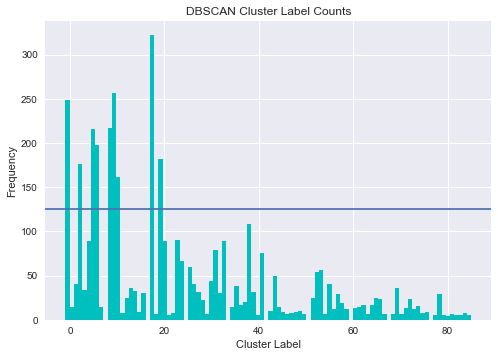

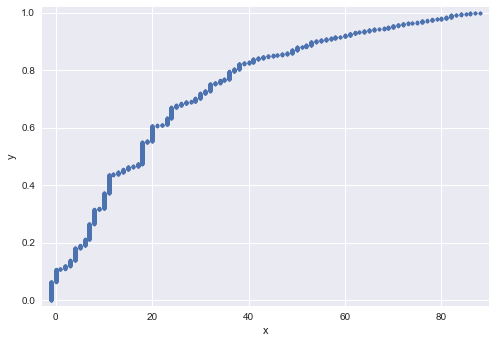

In [67]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel').count()
countr = df['clusterLabel'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['clusterLabel'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['clusterLabel'])) / (len(df['clusterLabel']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

 0     2401
-1      710
 1      620
 2      112
 7       38
 4       23
 6       18
 11      13
 9       12
 5        9
 13       7
 14       7
 8        7
 10       6
 3        4
 12       4
Name: clusterLabel.SVD, dtype: int64


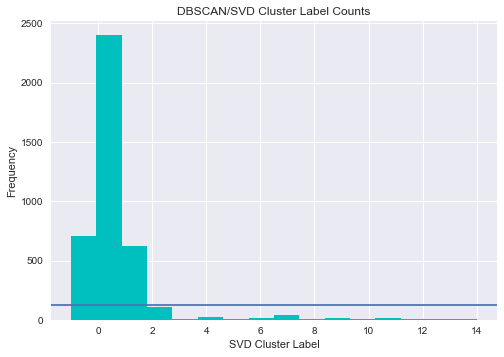

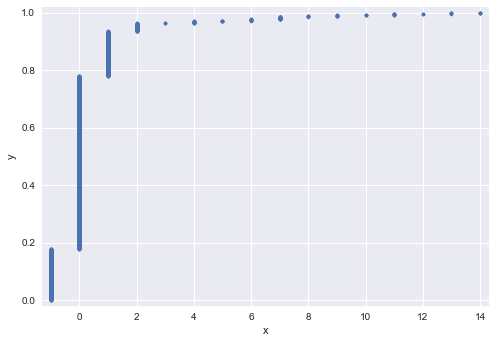

In [69]:
'''
DBSCAN/SVD
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel.SVD').count()
countr = lab.SVD.value_counts()
print (countr)
plt.hist(lab.SVD, bins=16, color='c')
plt.title("DBSCAN/SVD Cluster Label Counts")
plt.xlabel("SVD Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(lab.SVD)

# calculate the proportional values of samples
p = 1. * np.arange(len(lab.SVD)) / (len(lab.SVD) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

-1    3991
Name: clusterLabel.raw, dtype: int64


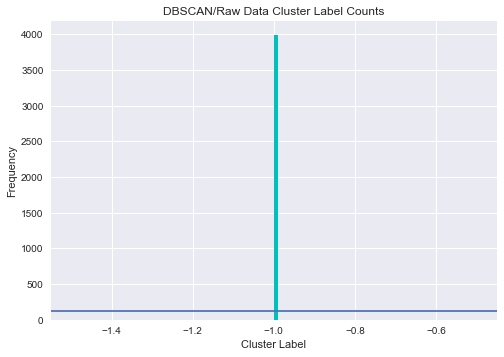

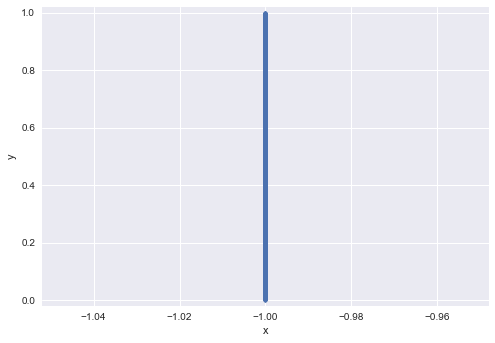

In [70]:
'''
DBSCAN/Raw Data
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel.raw').count()
countr = lab.raw.value_counts()
print (countr)
plt.hist(lab.raw, bins=96, color='c')
plt.title("DBSCAN/Raw Data Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(lab.raw)

# calculate the proportional values of samples
p = 1. * np.arange(len(lab.raw)) / (len(lab.raw) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()